#Plotting IBCAO Bathymetry
##500m grid vs 30 arc sec
These have the same resolution but are projected differently. Below I plot the 500m grid first then the arcsec data. 
Arcsec data seems to be in a more usable form in terms of relating it to AHNA4 gride as it is in LAt/Long coords.

However, it seems that when plotting full resolution using the arcsec data set, I run out of memory.

In [11]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma

from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import warnings

from salishsea_tools import (
    nc_tools,
    viz_tools,
)

%matplotlib inline

In [2]:
ibcao = nc.Dataset('//ocean//jthibaul//research//data//IBCAO//IBCAO_V3_500m_RR.grd')
ibcao2 = nc.Dataset('//ocean//jthibaul//research//data//IBCAO//IBCAO_V3_30arcsec_RR.grd')

In [16]:
ibcao.variables

OrderedDict([('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: x
    actual_range: [-2904000.  2904000.]
unlimited dimensions: 
current shape = (11617,)
filling off
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: y
    actual_range: [-2904000.  2904000.]
unlimited dimensions: 
current shape = (11617,)
filling off
), ('z', <class 'netCDF4._netCDF4.Variable'>
float32 z(y, x)
    long_name: z
    _FillValue: nan
    actual_range: [-5573.01660156  5921.39746094]
unlimited dimensions: 
current shape = (11617, 11617)
filling off
)])

In [17]:
nc_tools.show_dimensions(ibcao)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 11617

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 11617



In [18]:
ibcao_x = ibcao.variables['x']
ibcao_y = ibcao.variables['y']
ibcao_z= ibcao.variables['z']

In [19]:
ibcao_z.shape
#print(ibcao_z[:10,0])

(11617, 11617)

In [20]:
bathy = np.ma.masked_where(ibcao_z[:,:] > 0.0,ibcao_z)

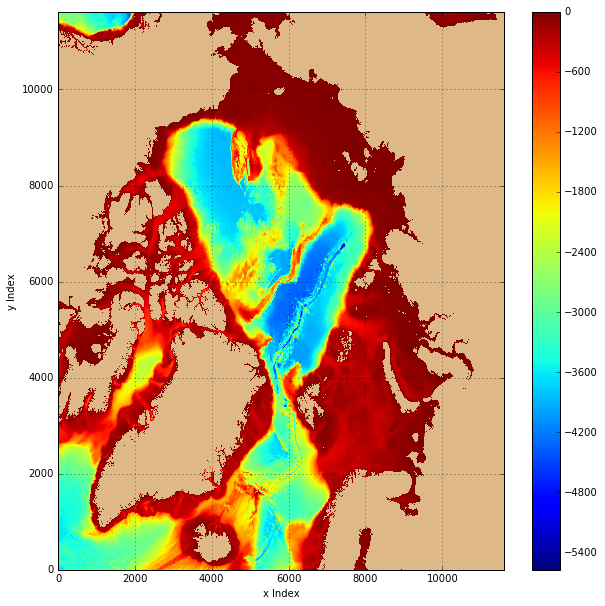

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy,cmap=cmap)
cbar = fig.colorbar(mesh,ax=ax)
plt.axis((0, bathy.shape[1], 0, bathy.shape[0]))
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
#cbar.set_label('{label} [{units}]'.format(label=veddyv.long_name.title(), units=veddyv.units))
#ax.set_title(u't = {t:.1f} Day, depth \u2248 {d:.2f}{z.units}'.format(t=7, d=zlevels[zlevel], z=zlevels))


In [22]:
ibcao2.variables

OrderedDict([('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: x
    actual_range: [-180.  180.]
unlimited dimensions: 
current shape = (43201,)
filling off
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: y
    actual_range: [ 64.  90.]
unlimited dimensions: 
current shape = (3121,)
filling off
), ('z', <class 'netCDF4._netCDF4.Variable'>
float32 z(y, x)
    long_name: z
    _FillValue: nan
    actual_range: [-5572.65283203  3341.38110352]
unlimited dimensions: 
current shape = (3121, 43201)
filling off
)])

In [23]:
nc_tools.show_dimensions(ibcao2)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 43201

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 3121



In [31]:
ibcao2_x = ibcao2.variables['x']
ibcao2_y = ibcao2.variables['y']
ibcao2_z= ibcao2.variables['z']

print(ibcao2_z.shape, ibcao2_x.shape,ibcao2_y.shape)
      

(3121, 43201) (43201,) (3121,)


In [52]:
bathy2 = np.ma.masked_where(ibcao2_z[:,:] > 0.0,ibcao2_z)



/home/jthibaul/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [57]:
#Change resoluton for easier plotting
x=ibcao2_x[::10,]
y=ibcao2_y[::10,]
bathy10=bathy2[::10,::10]

print(bathy10.shape,x.shape,y.shape)

(313, 4321) (4321,) (313,)


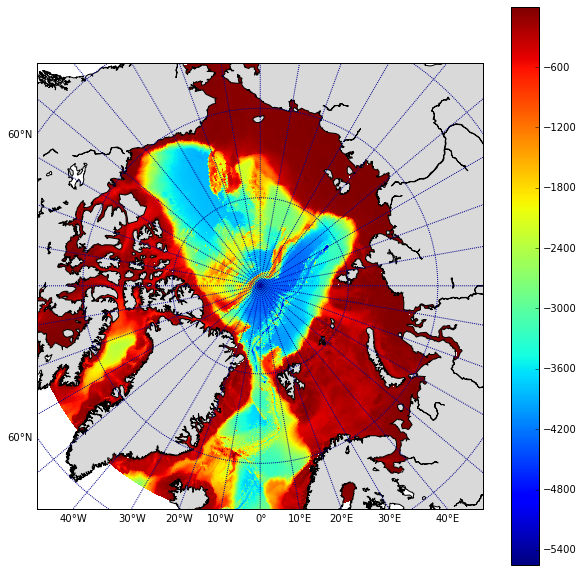

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=False, ax=axes)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
#x_lon, y_lat = m(x[:,],y[:,])
x_lon, y_lat = np.meshgrid(x[:], y[:])
X,Y = m(x_lon, y_lat)

m = m.pcolor(X,Y,bathy10[1:,1:])
cbar = fig.colorbar(m,ax=axes)

#cbar.set_label('{label} [{units}]'.format(label=veddyv.long_name.title(), units=veddyv.units))
#axes.set_title(u't = {t:.1f} Day, depth \u2248 {d:.2f}{z.units}'.format(t=7, d=zlevels[zlevel], z=zlevels))

##How to get roughness parameters from this data set?
So it seems that the arcsec projection of the bathymetry data will be the easiest to work with. Now I will need to consider how best to calculate roughness parameters from this data.

The following questions are relevant at this point:
1. When fitting a polynomial plane to the bottom bathymetry, how large should the area be?
    * This is a potential issue because I cannot fit one polynomial plane to each grid cell, and the question then becomes how many grid cells do I spread the polynomial plane over?
    * One option could be to fit the AHNA4 grid over the IBCAO grid and fit one polynomial plane for each AHNA4 grid.
    * Another option could be to take the bathymetric value of each of the 8 conjoining cells (4 corners and 4 sides) of each IBCAO grid cell and use this information to find h and kappa for the centre grid cell (see figure below).

    
2. Kappa could be calculated directly from the topography, and be different for the u and v directions - How can this be done, whats the best way to calculate?
    * Could an energy spectra be calculated from a 3D field? Then one wavenumber would be taken for each polynomial plane as a weighted average as all wavenumbers present in the spectra.
    

|      X        |       X       |   X   |
| ------------- |:-------------:| -----:|
|      ** X **      |  Grid Cell    |   **X **  |
|     **  X **      |   **   X   **     |  ** X **  |

## In IBCAO_processing2 I will test whether I can calculate the roughness parameters an individual grid cell

